In [1]:
import os
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import json


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Testing out ways to plot the raw data on a given trial

In [3]:
subj = '20649'
subj_dir = join('../../Data', subj)

In [4]:
# load the raw data
with open(join(subj_dir, (subj + "_output.json"))) as datafile:
    data = json.load(datafile)

In [5]:
# all keys stored in this dictionary
data.keys()

dict_keys(['expID', 'date', 'subjID', 'stimList', 'screenSettings', 'taskData'])

In [6]:
# total trials
len(data['taskData'])

35

### Isolate the data for a single trial

In [7]:
# extract a single trial
trialNum = 15
trial = data['taskData'][trialNum]

In [8]:
# view all keys for this trial (these keys are common to all trials)
trial.keys()

dict_keys(['trialNum', 'stimName', 'fixLocation', 'imgOrigin', 'imgDims', 'fixGaze', 'imgGaze', 'meanFPS'])

In [16]:
trial['trialNum']

'16'

In [9]:
# convert the x and y values from list to numpy array
x = np.asarray(trial['imgGaze']['x'], dtype=int)
y = np.asarray(trial['imgGaze']['y'], dtype=int)


In [10]:
# gaze points are recorded relative to the the 707x707 canvas. Need to translate to be relative to the image itself
imgOrigin = trial['imgOrigin']

x = x - float(imgOrigin[0])
y = y - float(imgOrigin[1])

In [11]:
# get the fix location on this trial
fixX = int(trial['fixLocation'][0]) - float(imgOrigin[0])
fixY = int(trial['fixLocation'][1]) - float(imgOrigin[1])

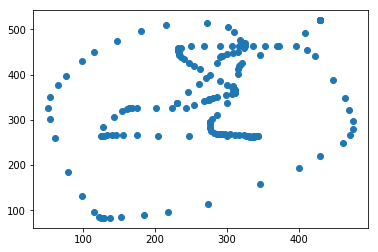

In [12]:
plt.scatter(x,y)

### Load the stim for this trial

In [13]:
thisStim = trial['stimName']
stim = mpimg.imread(join('../../Stimuli', thisStim))


In [17]:
stim.shape

(707, 566, 3)

### Plot "gaze" over the stim

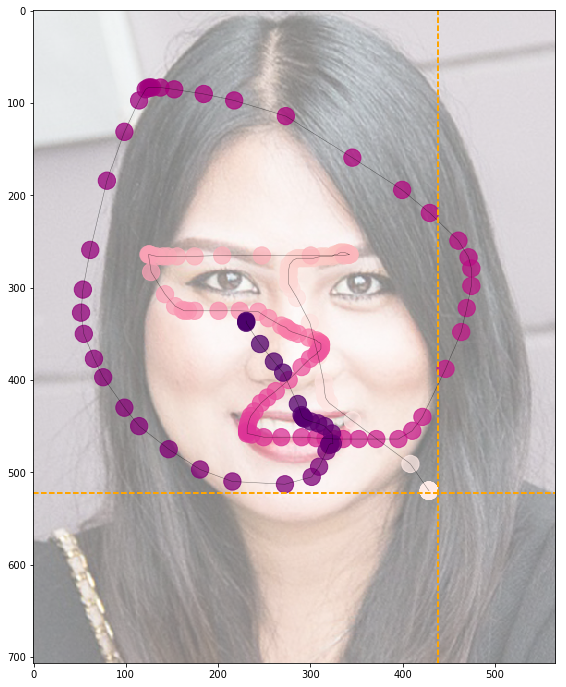

In [14]:
plt.figure(figsize=(15,12))

# draw the stim
plt.imshow(stim, alpha=.5)

# set color map for scatter plot
cmap = plt.get_cmap('RdPu', x.shape[0])
plt.scatter(x, y, s=300, c=np.arange(x.shape[0]), cmap=cmap, alpha=.75)

# connect the points with lines
plt.plot(x,y, 'k', alpha=.5, lw=.5)

# fixation cross location
plt.axhline(y=fixY, color='orange', ls='--', lw=2)
plt.axvline(x=fixX, color='orange', ls='--', lw=2)

### Creating pandas dataframe

In [19]:
df = pd.DataFrame({'x':x, 'y':y})

In [21]:
df['stimName'] = trial['stimName']

In [22]:
df.head()

,x,y,stimName
0,428.5,520.0,_images707/hmnBG/hmnBG_25.jpg
1,428.5,520.0,_images707/hmnBG/hmnBG_25.jpg
2,428.5,520.0,_images707/hmnBG/hmnBG_25.jpg
3,428.5,520.0,_images707/hmnBG/hmnBG_25.jpg
4,428.5,520.0,_images707/hmnBG/hmnBG_25.jpg
